# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

### <center>__ALUNO: Willian Adriano Ullmann Klein__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

Quando vemos uma relação em um diagrama de dispersão, podemos usar uma reta para resumir essa relação nos dados. Também podemos usar essa reta para fazer previsões a partir dos dados. Este processo é chamado de regressão linear.

Modelos de regressão linear são frequentemente ajustados usando a abordagem dos mínimos quadrados, mas que também pode ser montada de outras maneiras, tal como minimizando a "falta de ajuste" em alguma outra norma (com menos desvios absolutos de regressão), ou através da minimização de uma penalização da versão dos mínimos quadrados. Por outro lado, a abordagem de mínimos quadrados pode ser utilizado para ajustar a modelos que não são modelos lineares. Assim, embora os termos "mínimos quadrados" e "modelo linear" estejam intimamente ligados, eles não são sinônimos.

#### Expressão

A Regressão Linear pode ser definida pela expressão abaixo:

$y = b0 + b1.X$

Onde:

$y$: é a variável dependente, ou seja, o valor previsto.

$X$: é a variável independente, ou seja, a variável preditora.

$b0$: é o coeficiente que intercepta ou que corta o eixo y.

$b1$: é o coeficiente que define a inclinação da reta.

O objetivo é encontrar as melhores estimativas para os coeficientes, que minimizam os erros na previsão de y a partir de X.
Podemos estimar b1 como:

$b1 = soma ((Xi - médio (x)) * (yi - médio (y))) / soma ((xi - médio (x)) ²)$

Onde:

$média()$: é o valor médio da variável do conjunto de dados.

$Xi$ e $yi$: se referem ao fato de que precisamos repetir esses cálculos em todos os valores em nosso conjunto de dados e i se refere ao i’ésimo valor de $x$ ou $y$. E $b0$ podemos estimar como:

$b0 = média(y) - b1 * média(x)$

#### Erro Padrão

O erro padrão sobre a linha de regressão é uma medida do valor médio que a equação superestimou ou subestimou (Fig4), assim podemos analisar o coeficiente de determinação (R²), quanto maior esse valor, menor o erro padrão, com isso as previsões serão mais precisas provavelmente.

Podemos acrescentar o erro padrão à equação e, de uma forma geral, ficaria da seguinte forma:

$y = b0 + b1.X1 + e$

Onde:

$e$: é o erro padrão.

#### Coeficiente de Determinação R²
O valor do R² ou R-squared é uma medida estatística que nos mostra o quão próximos os dados estão ajustados à linha de regressão. É um valor de 0 à 1 que, quanto mais próximo de 1, melhor o ajuste e menor o erro associado.

O R² nos mostra a porcentagem da variação da variável resposta que é explicada por um modelo linear, podendo ser descrito por:

$R² = Variação explicada / Variação total$

- $0_% $ indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.

- $100_% $ indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

Bibliotecas necessárias para o desenvolvimento e implementação são importadas abaixo.

In [1]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import math, scipy, numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

O conjunto de dados que serão utilizados para a reprodução do método de regressão linear em python, são disponibilizados em [[1]](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Os dados são referentes ao estudo de  Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. 

Abaixo o conjunto de dados:

In [2]:
# dataset 

data = datasets.load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
# Criando um data frame com os dados do estudo:

df = pd.DataFrame(data['data'])
df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
# Atributos do DF

feature_names = data['feature_names']
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
# Medida quantitativa da progressão da doença um ano após a linha de base

df_target = pd.DataFrame(data['target'])
df_target

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


Portanto, temos um conjunto de dados com 442 instâncias e 10 colunas de atributos mais uma coluna do target. Os atributos considerados são:

- age age in years

- sex

- bmi body mass index

- bp average blood pressure

- s1 tc, total serum cholesterol

- s2 ldl, low-density lipoproteins

- s3 hdl, high-density lipoproteins

- s4 tch, total cholesterol / HDL

- s5 ltg, possibly log of serum triglycerides level

- s6 glu, blood sugar level

Cada uma dessas 10 variáveis ​​de recursos foram centradas na média e escalonadas pelo desvio padrão vezes n_samples (ou seja, a soma dos quadrados de cada coluna totaliza 1).

Enquanto a coluna 11(target) é uma medida quantitativa da progressão da doença um ano após a linha de base.


<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

A seguir será realizado um exemplo básico de regreção linear em um conjunto de dados limitado, somente para demontração.

In [6]:
# variável preditora
X = np.array([1.47, 1.5, 1.52, 1.55, 1.57, 1.63, 1.65, 1.68, 1.7, 1.73, 1.78, 1.8, 1.83]).reshape(-1, 1)
# variável alvo
y = np.array ([52.21, 53.12, 57.2, 58.6, 58.57, 59.93, 62, 63.11, 65.4, 66.28, 68.1, 72.19, 80.24])

In [7]:
# instanciando do modelo

model = LinearRegression()

In [8]:
# treinando o modelo

model.fit(X, y)

LinearRegression()

In [9]:
# imprimindo o coeficiente que corta o eixo y:

intercept = model.intercept_
print(f'Coeficiente de interceptação: {intercept:.4f}')

Coeficiente de interceptação: -39.3959


In [10]:
# imprimindo o coeficiente de inclinação da reta

slope = model.coef_
print(f'Coeficiente de inclinação:    {slope.round(4)}')

Coeficiente de inclinação:    [62.0783]


In [11]:
# Criando a equação:

print(f"y = {intercept} + {slope} * X")

y = -39.39593577566714 + [62.07833559] * X


In [12]:
# criando a equação e prevendo nos dados de X

y_pred_eq = intercept + slope * X
print(y_pred_eq.tolist())

[[51.85921754862052], [53.72156761646312], [54.963134328358194], [56.82548439620081], [58.06705110809588], [61.79175124378108], [63.033317955676154], [64.89566802351875], [66.13723473541383], [67.99958480325644], [71.10350158299411], [72.34506829488919], [74.20741836273179]]


In [13]:
# prevendo com o modelo nos dados de X

y_pred_model = model.predict(X)
print(y_pred_model)

[51.85921755 53.72156762 54.96313433 56.8254844  58.06705111 61.79175124
 63.03331796 64.89566802 66.13723474 67.9995848  71.10350158 72.34506829
 74.20741836]


- Então agora vamos plotar os dados num gráfico junto a linha de regressão gerada:

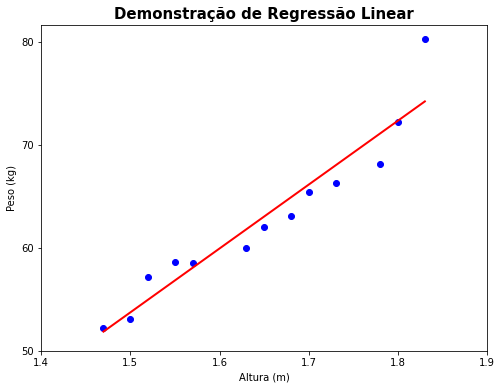

In [14]:
# definindo a área de plotagem e grafico
plt.figure(figsize=(8,6))
plt.scatter (X, y, color = 'blue') 
plt.plot (X, model.predict (X), color = 'red', linewidth = 2)

# definindo x e y
plt.xticks(np.arange(1.40, 1.95, 0.1))
plt.yticks([50, 60, 70, 80])

# inserindo os rótulos dos eixos
plt.xlabel("Altura (m)")
plt.ylabel("Peso (kg)")

# inserindo o título do gráfico
plt.title("Demonstração de Regressão Linear", fontweight="bold", size=15)

# plotando o gráfico
plt.show()

A Regressão Linear é um modelo muito utilizado para prever a relação entre duas ou mais variáveis. Neste exemplo o objetivo foi demonstrar como implementar o modelo em python de uma forma bem simples.

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

Aqui você irá  mostrar sua implementação para o problema considerado, explicando o que foi feito em cada passo e cada saída de cada trecho de código, sempre relacionando com a descrição do método mostrada acima.

- Carregando o conjunto de dados de diabetes

In [15]:
diabetes = datasets.load_diabetes()

- Usando apenas um recurso

In [16]:
diabetes_X = diabetes.data[:, np.newaxis, 8]
print(diabetes_X)

[[ 0.01990842]
 [-0.06832974]
 [ 0.00286377]
 [ 0.02269202]
 [-0.03199144]
 [-0.04118039]
 [-0.06291295]
 [-0.03581673]
 [-0.01495648]
 [ 0.06773633]
 [-0.06291295]
 [-0.09643322]
 [-0.03075121]
 [ 0.03839325]
 [-0.03199144]
 [ 0.03605579]
 [ 0.05228   ]
 [ 0.02736771]
 [-0.01811827]
 [-0.00894402]
 [-0.01190068]
 [-0.07212845]
 [-0.0611766 ]
 [ 0.13359898]
 [-0.02595242]
 [ 0.01919903]
 [-0.0425721 ]
 [-0.01599827]
 [-0.00060925]
 [ 0.0594238 ]
 [-0.02712865]
 [-0.03712835]
 [ 0.00027149]
 [-0.01811827]
 [-0.0594727 ]
 [ 0.02131085]
 [ 0.054724  ]
 [ 0.01703713]
 [ 0.07142403]
 [ 0.01919903]
 [ 0.01255315]
 [-0.04986847]
 [-0.00991896]
 [-0.0425721 ]
 [ 0.03243323]
 [-0.01495648]
 [-0.0079794 ]
 [-0.01811827]
 [-0.0594727 ]
 [ 0.03546194]
 [-0.02139368]
 [-0.00239668]
 [-0.01811827]
 [-0.03324879]
 [-0.04118039]
 [-0.06648815]
 [ 0.03365681]
 [-0.05615757]
 [-0.00060925]
 [ 0.03839325]
 [-0.05140054]
 [ 0.0366458 ]
 [-0.08238148]
 [-0.03075121]
 [-0.01919705]
 [ 0.0423449 ]
 [ 0.00027

- Dividindo os dados em conjuntos de treinamento / teste

In [17]:
# conjunto de treino

diabetes_X_train = diabetes_X[:-20]
print(diabetes_X_train)

[[ 0.01990842]
 [-0.06832974]
 [ 0.00286377]
 [ 0.02269202]
 [-0.03199144]
 [-0.04118039]
 [-0.06291295]
 [-0.03581673]
 [-0.01495648]
 [ 0.06773633]
 [-0.06291295]
 [-0.09643322]
 [-0.03075121]
 [ 0.03839325]
 [-0.03199144]
 [ 0.03605579]
 [ 0.05228   ]
 [ 0.02736771]
 [-0.01811827]
 [-0.00894402]
 [-0.01190068]
 [-0.07212845]
 [-0.0611766 ]
 [ 0.13359898]
 [-0.02595242]
 [ 0.01919903]
 [-0.0425721 ]
 [-0.01599827]
 [-0.00060925]
 [ 0.0594238 ]
 [-0.02712865]
 [-0.03712835]
 [ 0.00027149]
 [-0.01811827]
 [-0.0594727 ]
 [ 0.02131085]
 [ 0.054724  ]
 [ 0.01703713]
 [ 0.07142403]
 [ 0.01919903]
 [ 0.01255315]
 [-0.04986847]
 [-0.00991896]
 [-0.0425721 ]
 [ 0.03243323]
 [-0.01495648]
 [-0.0079794 ]
 [-0.01811827]
 [-0.0594727 ]
 [ 0.03546194]
 [-0.02139368]
 [-0.00239668]
 [-0.01811827]
 [-0.03324879]
 [-0.04118039]
 [-0.06648815]
 [ 0.03365681]
 [-0.05615757]
 [-0.00060925]
 [ 0.03839325]
 [-0.05140054]
 [ 0.0366458 ]
 [-0.08238148]
 [-0.03075121]
 [-0.01919705]
 [ 0.0423449 ]
 [ 0.00027

In [18]:
# conjunto de teste

diabetes_X_test = diabetes_X[-20:] 
print(diabetes_X_test)

[[ 0.04067226]
 [ 0.01556684]
 [ 0.02405258]
 [-0.02028875]
 [ 0.03546194]
 [-0.04542096]
 [ 0.06604821]
 [-0.02595242]
 [-0.00991896]
 [-0.01495648]
 [ 0.05568355]
 [-0.05140054]
 [-0.04542096]
 [-0.03845911]
 [-0.0611766 ]
 [ 0.03119299]
 [-0.01811827]
 [-0.04687948]
 [ 0.04452837]
 [-0.00421986]]


- Dividindo os alvos em conjuntos de treinamento/teste

In [19]:
# conjunto de treino

diabetes_y_train = diabetes.target[:-20]
print(diabetes_y_train)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [20]:
# conjunto de teste

diabetes_y_test = diabetes.target[-20:]
print(diabetes_y_test)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


- Criando o objeto de regressão linear

In [21]:
regr = linear_model.LinearRegression()

- Treinando o modelo usando os conjuntos de treinamento

In [22]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

- Fazendo previsões usando o conjunto de teste

In [23]:
diabetes_y_pred = regr.predict(diabetes_X_test)
print(diabetes_y_pred)

[189.83629612 167.23158467 174.87207348 134.94750639 185.1449626
 112.31867268 212.68458449 129.84797882 144.28437975 139.74864058
 203.35233187 106.93471064 112.31867268 118.58706067  98.13242735
 181.30123723 136.901789   111.00542879 193.3083059  149.41580007]


- Os coeficientes

In [24]:
print('Coeficientes: ', regr.coef_, "\n")

Coeficientes:  [900.39171612] 



- O erro quadrático médio

In [25]:
print("Erro quadrático médio: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Erro quadrático médio: 2923.34


- Pontuação de variância explicada: 1 é a previsão perfeita

In [26]:
print('Pontuação de variância : %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Pontuação de variância : 0.39


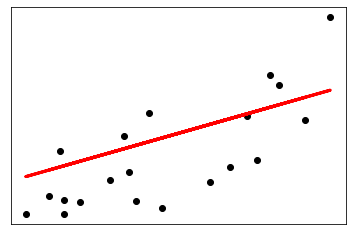

In [27]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Agora fazendo uso de várias varáveis:
- Primeiro passo para simplificar a visualização dos dados atuais, colocar os dados em um dataframe:

In [28]:
df = pd.DataFrame(data['data'])
df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


- Queremos apenas variáveis/colunas 0, 1, 3, 4, 7 e 8 (pode ser qualquer coluna para usar)

In [29]:
# variáveeis preditórias

predictor_variables = [0,1,3,4,7,8]
X = df[predictor_variables]
X

,0,1,3,4,7,8
0,0.038076,0.050680,0.021872,-0.044223,-0.002592,0.019908
1,-0.001882,-0.044642,-0.026328,-0.008449,-0.039493,-0.068330
2,0.085299,0.050680,-0.005671,-0.045599,-0.002592,0.002864
3,-0.089063,-0.044642,-0.036656,0.012191,0.034309,0.022692
4,0.005383,-0.044642,0.021872,0.003935,-0.002592,-0.031991
...,...,...,...,...,...,...
437,0.041708,0.050680,0.059744,-0.005697,-0.002592,0.031193
438,-0.005515,0.050680,-0.067642,0.049341,0.034309,-0.018118
439,0.041708,0.050680,0.017282,-0.037344,-0.011080,-0.046879
440,-0.045472,-0.044642,0.001215,0.016318,0.026560,0.044528


In [30]:
# variável alvo

y = data['target']
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

- Dividindo nossos dados em 70% de treinamento (para ajuste) e 30% de teste (para previsão)

In [31]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, train_size=.7)

- Ajustaando o modelo

In [32]:
model = regr.fit(X_train, Y_train)

- Verificando a precisão/variação

In [33]:
score_r2 = model.score(x_test, y_test)

- valores previstos a partir dos dados de teste

In [34]:
predictions = model.predict(x_test)
print(predictions)

[135.14840759 174.51580607 268.4971677  156.23561916 167.31207836
 139.95006311  96.32757308 148.3447642  108.92583425  66.72705968
 233.75376769 129.91683769 109.14915798 194.0859196  213.91569966
 118.45043316 132.45931756 161.97198823 179.58282971 215.58954376
 136.868806   185.04959387 171.7244425  103.4054633   42.21719076
 128.54373005 115.2326839  193.58977521 135.39350873 233.97440879
 202.35010597 213.01301832 200.70638782 166.71435534  88.24925537
 292.37108811 114.57229275 207.52471024 211.65145764 111.69023512
  85.70065496 317.56640101  82.62566683  92.42444069 190.90961739
 197.86862528 153.9116924  119.50560644 154.1505401  106.94791657
 139.72206786  78.12189065 177.75217551 142.16548985 106.81801704
  64.48647206 174.27026736 192.75936392 108.73092124 164.34214397
 206.06599714 159.74687102  97.60127236 148.74444608  78.75186594
 208.15567725 120.20057013 201.3541952  306.91774195 157.56937716
 110.34649166 112.97126928 106.05713231 158.339852   190.83742803
 178.83657

- Para olhar os dados de teste com variáveis independentes (preditores) vamos configurar um dataframe de resumo para capturar a saída de nossas previsões de modelo para nossos dados de teste

In [35]:
summary_df = pd.DataFrame(x_test)
summary_df['alvo'] = y_test
summary_df = summary_df.rename(columns={0:"A", 1:"B", 3:"C", 4:"D", 7:"E", 8:"F"})
summary_df['alvo'] = y_test

- Capturando nossas previsões em uma nova coluna a partir do método model.predict

In [36]:
summary_df['predicao'] = predictions
summary_df

,A,B,C,D,E,F,alvo,predicao
348,0.030811,-0.044642,-0.005671,-0.004321,-0.039493,-0.010904,148.0,135.148408
231,0.009016,-0.044642,0.021872,0.008063,-0.002592,0.009436,154.0,174.515806
251,-0.052738,0.050680,0.087287,0.060349,0.108111,0.084495,243.0,268.497168
91,0.045341,-0.044642,-0.053871,0.063101,0.034309,0.037232,164.0,156.235619
415,-0.005515,-0.044642,-0.050428,0.025950,0.071210,0.014823,174.0,167.312078
...,...,...,...,...,...,...,...,...
439,0.041708,0.050680,0.017282,-0.037344,-0.011080,-0.046879,132.0,118.078264
177,0.048974,-0.044642,-0.025180,0.023198,0.080066,0.072224,225.0,223.756594
293,-0.070900,-0.044642,0.012691,0.020446,0.000360,-0.054544,200.0,123.637501
256,-0.049105,-0.044642,-0.046985,-0.029088,0.034309,0.028017,346.0,180.538108


- Métricas adicionais

In [37]:
print(" Pontuação R2:  ", score_r2)
print("Interceptação:", regr.intercept_)

 Pontuação R2:   0.44628959608908814
Interceptação: 150.37612817171112


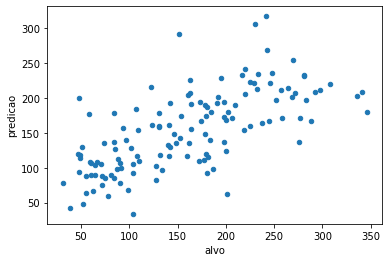

In [38]:
summary_df.plot(kind="scatter", x="alvo", y="predicao")

#### Referências:

https://medium.com/data-hackers/como-funciona-uma-regressão-linear-f7208fa6c662

https://pt.wikipedia.org/wiki/Regressão_linear